In [1]:
import pandas as pd

In [2]:
health_impact = pd.read_csv(r"..\data\raw\health_impact_2025.csv")

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.cm

In [3]:
health_impact.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [4]:
health_impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [8]:
health_impact['Mental_Health_Status'].unique()

array(['Stress Disorder', 'ADHD', nan, 'Burnout', 'Anxiety', 'PTSD',
       'Depression'], dtype=object)

In [9]:
health_impact['Mental_Health_Status'] = health_impact['Mental_Health_Status'].fillna('N/A')

In [11]:
health_impact['Physical_Health_Issues'].unique()

array(['Shoulder Pain; Neck Pain', 'Back Pain',
       'Shoulder Pain; Eye Strain', nan, 'Back Pain; Shoulder Pain',
       'Back Pain; Shoulder Pain; Wrist Pain', 'Neck Pain',
       'Shoulder Pain', 'Eye Strain; Wrist Pain', 'Back Pain; Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain', 'Back Pain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain', 'Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain; Neck Pain',
       'Eye Strain; Neck Pain', 'Shoulder Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain', 'Wrist Pain',
       'Back Pain; Shoulder Pain; Neck Pain',
       'Back Pain; Eye Strain; Neck Pain',
       'Back Pain; Shoulder Pain; Eye Strain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain', 'Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain; Wrist Pain', 'Shoulder Pain; Wrist Pain',
       'Back Pain; Shoulder Pain; Ey

In [12]:
health_impact['Physical_Health_Issues'] = health_impact['Physical_Health_Issues'].fillna('N/A')

In [13]:
health_impact.isna().sum()

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64

In [40]:
count_role_status = health_impact.groupby('Job_Role')['Mental_Health_Status'].count().reset_index()

In [41]:
health_impact.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


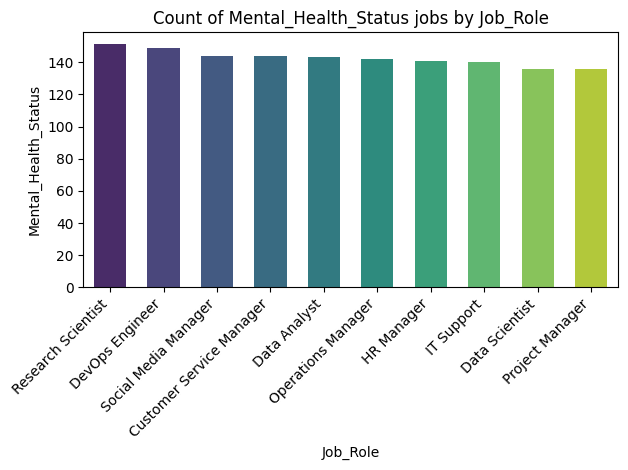

In [42]:
top_roles = (
    health_impact['Job_Role']
    .value_counts()
    .head(10)
    .reset_index(name='Mental_Health_Status')
    .rename(columns={'index': 'Job_Role'})
)

# Plot


sns.barplot(x='Job_Role', y='Mental_Health_Status',hue='Job_Role', data=top_roles,width=0.6,palette='viridis')
plt.title('Count of Mental_Health_Status jobs by Job_Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Job_Role

In [29]:
health_impact['Job_Role'].unique()

array(['Data Analyst', 'Business Analyst', 'DevOps Engineer',
       'IT Support', 'Technical Writer', 'Software Engineer',
       'HR Manager', 'Project Manager', 'Data Scientist', 'UX Designer',
       'Social Media Manager', 'Digital Marketing Specialist',
       'Account Manager', 'Research Scientist', 'Sales Representative',
       'Operations Manager', 'Customer Service Manager',
       'Product Manager', 'Quality Assurance', 'Executive Assistant',
       'Financial Analyst', 'Marketing Specialist', 'Consultant',
       'Content Writer'], dtype=object)

In [ ]:
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704

In [31]:
health_impact['Burnout_Level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [36]:
count_role_bournout = health_impact.groupby('Job_Role')['Burnout_Level'].count().reset_index()

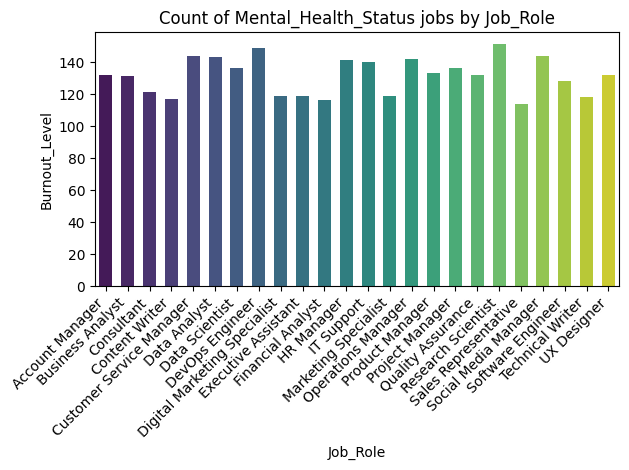

In [33]:
sns.barplot(x='Job_Role', y='Burnout_Level',hue='Job_Role', data=count_role_bournout,width=0.6,palette='viridis')
plt.title('Count of Mental_Health_Status jobs by Job_Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

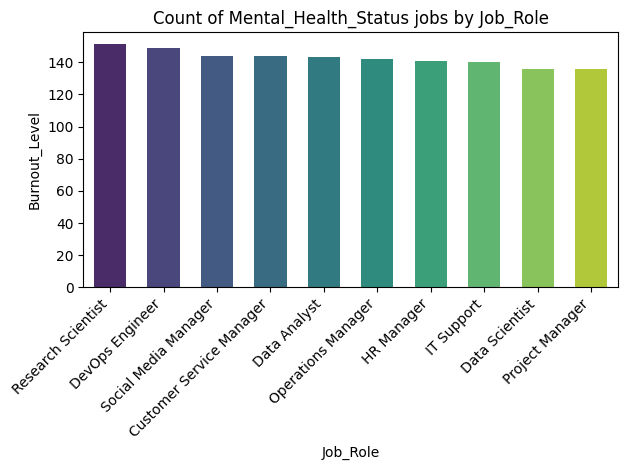

In [34]:
top_roles_burn = (
    health_impact['Job_Role']
    .value_counts()
    .head(10)
    .reset_index(name='Burnout_Level')
    .rename(columns={'index': 'Job_Role'})
)

# Plot


sns.barplot(x='Job_Role', y='Burnout_Level',hue='Job_Role', data=top_roles_burn,width=0.6,palette='viridis')
plt.title('Count of Mental_Health_Status jobs by Job_Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
count_region_bournout = health_impact.groupby('Region')['Burnout_Level'].count().reset_index()

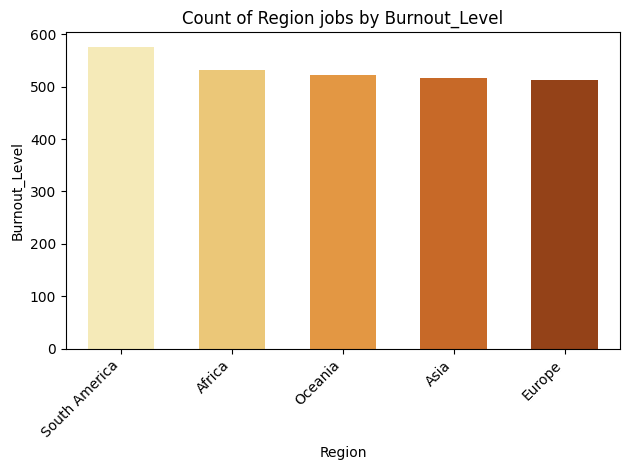

In [55]:
region_bournout = (
    health_impact['Region']
    .value_counts()
    .head()
    .reset_index(name='Burnout_Level')
    .rename(columns={'index': 'Region'}))
        
sns.barplot(x='Region', y='Burnout_Level',hue='Region', data=region_bournout,width=0.6,palette='YlOrBr')
plt.title('Count of Region jobs by Burnout_Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()